# CHECKING DEPENDENT VARIABLES

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

boston_df = pd.read_csv("Boston.csv")
boston_df.columns[:len(boston_df.columns)-1]

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

# CHECKING NON-DEPENDENT VARIABLES 

In [9]:
boston_df.columns[len(boston_df.columns)-1:len(boston_df.columns)]

Index(['medv'], dtype='object')

## DETERMINING THE RELATIONSHIP BETWEEN MEDV AND LSTAT
The LSTAT variable is the percentage of families belonging to the low income group living in the relevant neighborhood.
Logically,as the proportion of low income families living in the surrounding area increases, house prices are expected to decrease.
Let's check out if its the true result.

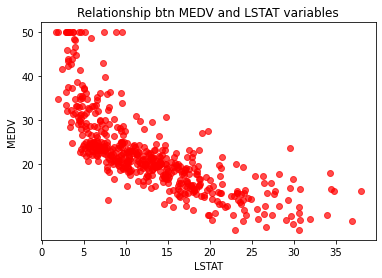

In [17]:
plt.scatter(boston_df['lstat'],boston_df['medv'], alpha=0.7,c='r')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Relationship btn MEDV and LSTAT variables")
plt.show()

So as depicted above, the MEDV variable decreases as LSTAT increases

Let's define the non-depedent vars as X and dependent vars as Y. And since we only using the LSTAT var,let's take it alone

In [24]:
x = boston_df.drop("medv",axis = 1).values
lstat = boston_df[["lstat"]].values
medv = boston_df["medv"].values

In [25]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(lstat,medv)

LinearRegression()

Now, lets draw a reg line using the created model. The model.predict(lstat) expression we use to draw the line gives the MEDV values estimated according to the created model.

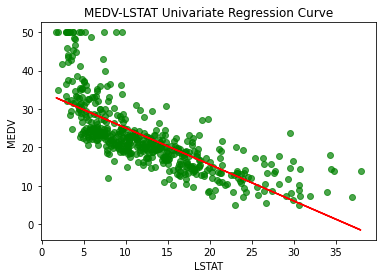

In [28]:
plt.scatter(lstat,medv,c="g",alpha = 0.7)
plt.plot(lstat,model.predict(lstat),c="r")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("MEDV-LSTAT Univariate Regression Curve")
plt.show()

In [29]:
model.intercept_

34.55384087938311

In [30]:
model.coef_

array([-0.95004935])

# NOW LETS USE NORE THAN ONE VARIABLE FOR THE MODEL

In [31]:
x = boston_df[["lstat","age"]].values
y = boston_df["medv"].values

In [33]:
model1 = linear_model.LinearRegression()
model1.fit(x,y)
print(model1.intercept_)
print(model1.coef_)

33.2227605317929
[-1.03206856  0.03454434]


In [34]:
x = boston_df.drop("medv",axis = 1)
y = boston_df["medv"]

model = linear_model.LinearRegression()
model.fit(x,y)
print(model.intercept_)
print(model.coef_)

36.461351871167
[-2.52625878e-03 -1.08762336e-01  4.80307622e-02  1.99323137e-02
  2.70524534e+00 -1.75416021e+01  3.83922506e+00 -1.93844593e-03
 -1.49330389e+00  3.24925469e-01 -1.15975305e-02 -9.47985187e-01
  9.35664033e-03 -5.26183831e-01]


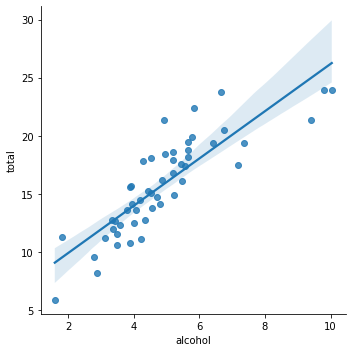

In [45]:
import seaborn as sns
car_crashes = sns.load_dataset("car_crashes")
sns.lmplot(x= "alcohol",y = "total" ,data = car_crashes)
plt.show()

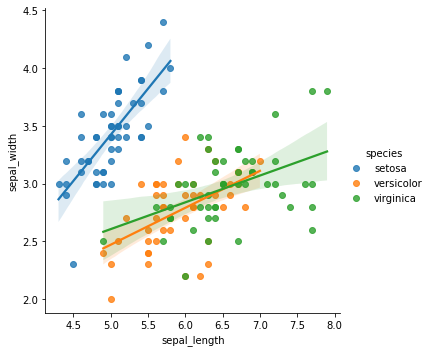

In [46]:
iris = sns.load_dataset("iris")
sns.lmplot(x = "sepal_length",y = "sepal_width", hue = "species", data = iris)
plt.show()

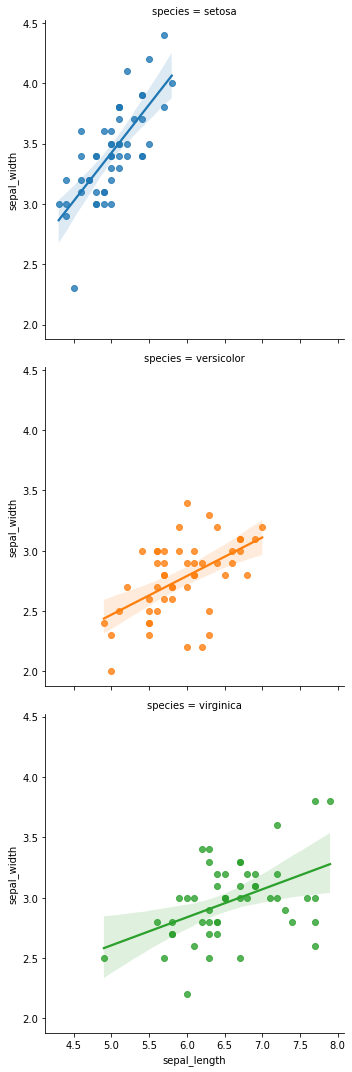

In [48]:
sns.lmplot(x = "sepal_length",y = "sepal_width",row = "species", hue = "species", data = iris)
plt.show()

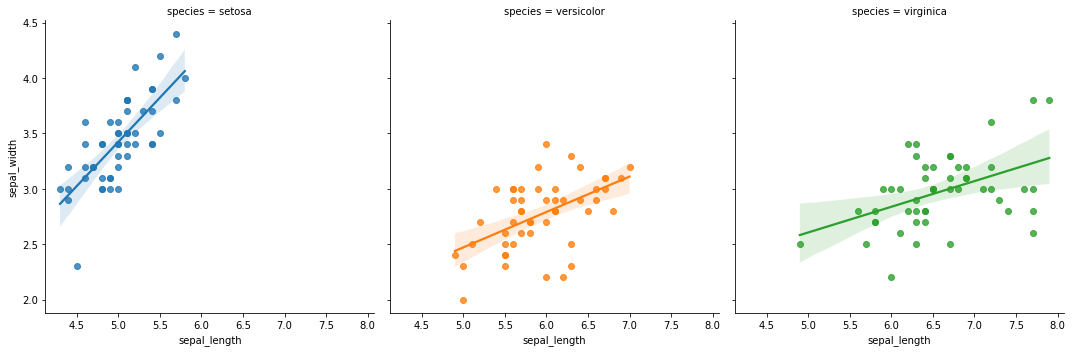

In [51]:
sns.lmplot(x = "sepal_length",y = "sepal_width",col = "species", hue = "species", data = iris)
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

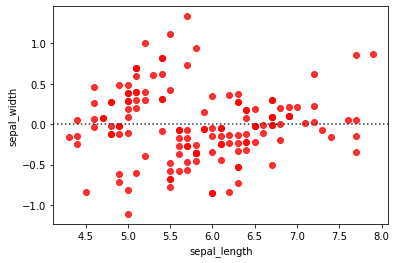

In [50]:
sns.residplot(x = "sepal_length",y = "sepal_width",color = "red", data = iris)